<a href="https://colab.research.google.com/github/SaymaSJ/Porject-IoMT-/blob/main/(Viral_Fever).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load Dataset

In [ ]:
data = pd.read_csv("health.csv", encoding='unicode_escape')
data.head()

,Temperature (),Heart Rate (BPM),Oxygen Saturation (%),Movement (g),Outcome
0,98.8,94,96,0.98,0
1,100.5,97,92,0.98,1
2,100.6,96,94,0.97,1
3,99.3,95,95,0.98,0
4,100.2,97,93,0.99,1


Check missing Values

In [ ]:
data.isnull().sum()

Temperature ()           0
Heart Rate (BPM)         0
Oxygen Saturation (%)    0
Movement (g)             0
Outcome                  0
dtype: int64

Cleaning dataset(Auto-Cleannig and preprocessing)

In [ ]:
pip install py-AutoClean

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.0 MB/s eta 0:00:00
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10273 sha256=0cddb5ada7e354a16a70977a0b665591c27dc0947daac592aa956f3a2516090b
  Stored in directory: /root/.cache/pip/wheels/b5/13/2b/3a5fdae6161f870ea670f2bf3a7157f8a5b38b166282b6bc92
Successfully built py-AutoClean


# Data preprocessing








In [ ]:
from AutoClean import AutoClean

In [ ]:
pipeline=AutoClean(data)
pipeline.output.head()

AutoClean process completed in 0.137966 seconds
Logfile saved to: /content/autoclean.log


,Temperature (),Heart Rate (BPM),Oxygen Saturation (%),Movement (g),Outcome
0,98.8,94,96,0.98,0
1,100.5,97,92,0.98,1
2,100.6,96,94,0.97,1
3,99.3,95,95,0.98,0
4,100.2,97,93,0.99,1


In [ ]:
data.shape

(949, 5)

In [ ]:
data.describe()

,Temperature (),Heart Rate (BPM),Oxygen Saturation (%),Movement (g),Outcome
count,949.00000,949.000000,949.000000,949.000000,949.000000
mean,101.60411,98.981033,88.275026,0.982371,0.680717
std,30.14080,4.789411,39.504302,0.009998,0.466445
min,98.00000,4.000000,5.000000,0.960000,0.000000
25%,99.20000,96.000000,81.000000,0.980000,0.000000
50%,100.50000,99.000000,90.000000,0.980000,1.000000
75%,101.90000,101.000000,92.000000,0.990000,1.000000
max,1028.00000,116.000000,929.000000,1.000000,1.000000


In [ ]:
from collections import Counter

In [ ]:
pip install imblearn

In [ ]:
print(sorted(Counter(data['Outcome']).items()))

[(0, 303), (1, 646)]


# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#creation of instance
scaler.fit(data.drop('Outcome',axis=1))
scaled_features = scaler.transform(data.drop('Outcome',axis=1))

In [ ]:
X = scaled_features
y = data['Outcome']

In [ ]:
print(f'X:{X.shape}')
print(f'y:{y.shape}')


X:(949, 4)
y:(949,)


Over-sampling

In [ ]:
y.value_counts()


1    646
0    303
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

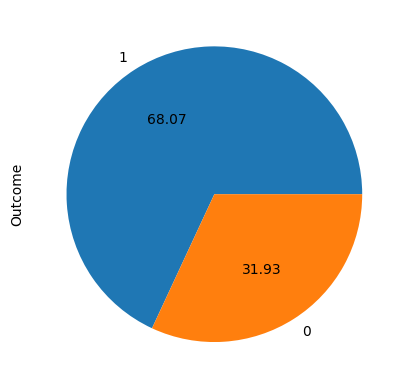

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')


# Less important


[(0, 646), (1, 646)] (1292,)


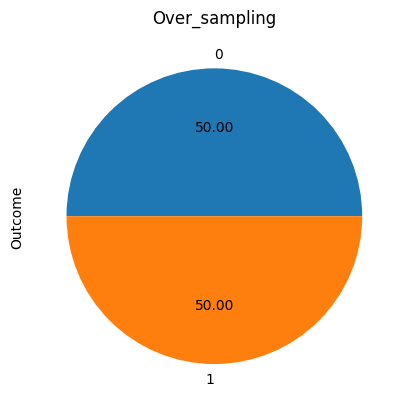

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# # # rus=RandomUnderSampler(sampling_strategy=1)
# ros = RandomOverSampler(sampling_strategy="auto")
# X_res, y_res = ros.fit_resample(X, y)
# # print('Resampled dataset shape %s' % Counter(y_res))
# # X_res, y_res = rus.fit_resample(X,y)
# # # print(sorted(Counter(y).items()),y_res.shape)
# ax= y_res.value_counts().plot.pie(autopct='%.2f')
# _=ax.set_title("Over_sampling")
# print(sorted(Counter(y_res).items()),y_res.shape)


from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_res, y_res = sm.fit_resample(X,y)
ax= y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Over_sampling")
print(sorted(Counter(y_res).items()),y_res.shape)

# from imblearn.under_sampling import RandomUnderSampler
# rus=RandomUnderSampler(sampling_strategy=1)
# X_res, y_res = rus.fit_resample(X,y)
# # print(sorted(Counter(y).items()),y_res.shape)
# ax= y_res.value_counts().plot.pie(autopct='%.2f')
# _=ax.set_title("Under_sampling")




# splitting test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,train_size=.3 ,shuffle=True,random_state=17)

In [ ]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (387, 4)
X_test: (905, 4)
y_train: (387,)
y_test: (905,)


# SVM(Classifier)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
svm = SVC(kernel='linear',gamma="auto", probability=True, C=17)
svm.fit(X_train, y_train)
y_pred =svm.predict(X_test)
# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
svm.score(X_test,y_test)
train_predictions = svm.predict(X_train)
val_predictions =svm.predict(X_test)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_test, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
accuracy_score(y_test,y_pred)


[[448   1]
 [ 67 389]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       449
           1       1.00      0.85      0.92       456

    accuracy                           0.92       905
   macro avg       0.93      0.93      0.92       905
weighted avg       0.93      0.92      0.92       905

Training Accuracy: 0.9198966408268734
Validation Accuracy: 0.9248618784530387


0.9248618784530387

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9248618784530387
Precision: 0.9974358974358974
Recall: 0.8530701754385965
F1-Score: 0.9196217494089834


# Grid Search method for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
svm = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,5,6,10,15,20],
    'kernel': ['rbf','linear',]
}, cv=5, return_train_score=False,scoring='f1_macro')
svm.fit(X_train, y_train)
svm.cv_results_

{'mean_fit_time': array([0.00788212, 0.00840416, 0.00702672, 0.01084886, 0.00709968,
        0.00789094, 0.00811863, 0.02323885, 0.00668306, 0.03239708,
        0.00946708, 0.02136979]),
 'std_fit_time': array([0.00258271, 0.00353196, 0.00097385, 0.00335336, 0.00094868,
        0.0013779 , 0.00300595, 0.00544485, 0.00024088, 0.03347837,
        0.00354202, 0.0099169 ]),
 'mean_score_time': array([0.00542197, 0.00615401, 0.00635462, 0.00367565, 0.00442958,
        0.00377855, 0.00539436, 0.00981874, 0.00408564, 0.00357041,
        0.00607033, 0.00364761]),
 'std_score_time': array([1.36334589e-03, 3.34216513e-03, 4.11381766e-03, 1.37064384e-04,
        1.70078062e-04, 5.88525754e-04, 2.53732508e-03, 3.88017726e-03,
        5.32276299e-05, 1.91125684e-04, 3.42696278e-03, 1.97830330e-04]),
 'param_C': masked_array(data=[1, 1, 5, 5, 6, 6, 10, 10, 15, 15, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
   

In [ ]:
data = pd.DataFrame(svm.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007882,0.002583,0.005422,0.001363,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.705080,0.749451,0.761364,0.714238,0.734848,0.732996,0.021024,12
1,0.008404,0.003532,0.006154,0.003342,1,linear,"{'C': 1, 'kernel': 'linear'}",0.806131,0.785861,0.840909,0.711905,0.757013,0.780364,0.043799,11
2,0.007027,0.000974,0.006355,0.004114,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.832646,0.814538,0.881841,0.752579,0.798535,0.816028,0.042288,10
3,0.010849,0.003353,0.003676,0.000137,5,linear,"{'C': 5, 'kernel': 'linear'}",0.883058,0.868687,0.894665,0.882801,0.839583,0.873759,0.018968,4
4,0.007100,0.000949,0.004430,0.000170,6,rbf,"{'C': 6, 'kernel': 'rbf'}",0.832646,0.814538,0.908099,0.752579,0.798535,0.821279,0.050891,9
5,0.007891,0.001378,0.003779,0.000589,6,linear,"{'C': 6, 'kernel': 'linear'}",0.883058,0.868687,0.894665,0.882801,0.839583,0.873759,0.018968,4
6,0.008119,0.003006,0.005394,0.002537,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.870432,0.841033,0.908099,0.830712,0.812847,0.852625,0.033440,8
7,0.023239,0.005445,0.009819,0.003880,10,linear,"{'C': 10, 'kernel': 'linear'}",0.922259,0.882274,0.894665,0.921429,0.853587,0.894843,0.025762,3
8,0.006683,0.000241,0.004086,0.000053,15,rbf,"{'C': 15, 'kernel': 'rbf'}",0.870432,0.841033,0.908099,0.870108,0.839583,0.865851,0.025020,6
9,0.032397,0.033478,0.003570,0.000191,15,linear,"{'C': 15, 'kernel': 'linear'}",0.935377,0.882274,0.894665,0.921429,0.867424,0.900234,0.024957,2


In [ ]:
data[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.732996
1,1,linear,0.780364
2,5,rbf,0.816028
3,5,linear,0.873759
4,6,rbf,0.821279
5,6,linear,0.873759
6,10,rbf,0.852625
7,10,linear,0.894843
8,15,rbf,0.865851
9,15,linear,0.900234


# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [ ]:
# Assign algorithm
knn = KNeighborsClassifier(n_neighbors=5)

# Fit algorithm to data
knn.fit(X_train, y_train)

# Run algorithm on test data to make predictions
knn_pred = knn.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# accuracy_score(y_test,knn)
# train_predictions =knn_pred(X_train)
# val_predictions = knn_pred(X_test)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_test, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")



[[429  20]
 [ 56 400]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       449
           1       0.95      0.88      0.91       456

    accuracy                           0.92       905
   macro avg       0.92      0.92      0.92       905
weighted avg       0.92      0.92      0.92       905

Accuracy: 0.9160220994475138
Precision: 0.9523809523809523
Recall: 0.8771929824561403
F1-Score: 0.9132420091324202
Training Accuracy: 0.9198966408268734
Validation Accuracy: 0.9248618784530387


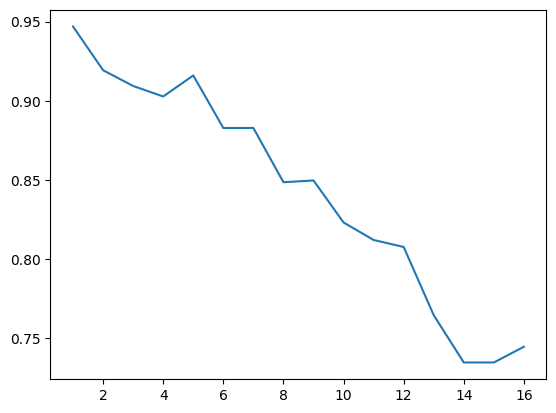

In [ ]:
import matplotlib.pyplot as plt
k_range = list(range(1, 17))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()


# Logistic_Regression(Classfication)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
# Assign algorithm
lr=LogisticRegression( penalty='l1', solver='liblinear')



# Link algorithm to X and y variables
lr.fit(X_train, y_train)

# Run algorithm on test data to make predictions
y1_pred = lr.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test,y1_pred))
lr.score=(X_test,y_test)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y1_pred)
recall = recall_score(y_test, y1_pred)
f1 = f1_score(y_test, y1_pred)

print("Accuracy:", accuracy_score(y_test, y1_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[[448   1]
 [ 48 408]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       449
           1       1.00      0.89      0.94       456

    accuracy                           0.95       905
   macro avg       0.95      0.95      0.95       905
weighted avg       0.95      0.95      0.95       905

Accuracy: 0.9458563535911603
Precision: 0.9975550122249389
Recall: 0.8947368421052632
F1-Score: 0.9433526011560694


# Decsion trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Assign algorithm
dt = DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_split=10,min_samples_leaf=10,max_features=3)

# Link algorithm to X and y variables
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# # Check prediction error for training data using MAE
# mae_train = mean_absolute_error(y_train, dt.predict(X_train))
# print ("Training Set Mean Absolute Error: %.2f" % mae_train)

# # Check prediction error for test data using MAE
# mae_test = mean_absolute_error(y_test,dt.predict(X_test))
# print ("Test Set Mean Absolute Error: %.2f" % mae_test)
# # Predict on the training and validation sets
train_predictions = dt.predict(X_train)
val_predictions = dt.predict(X_test)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_test, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[[393  56]
 [  1 455]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       449
           1       0.89      1.00      0.94       456

    accuracy                           0.94       905
   macro avg       0.94      0.94      0.94       905
weighted avg       0.94      0.94      0.94       905

Training Accuracy: 0.9612403100775194
Validation Accuracy: 0.9370165745856354
Accuracy: 0.9370165745856354
Precision: 0.8904109589041096
Recall: 0.9978070175438597
F1-Score: 0.9410548086866598


In [ ]:
n_components = list(range(1, X.shape[1] + 1, 1))
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6]
min_samples_split=[80,85]
min_samples_leaf=[80,85]
max_features=[2,5]






parameters = {
    'max_depth': max_depth,
    'criterion': criterion,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

print('Best Criterion:', grid_search.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_search.best_estimator_.get_params()['max_depth'])
print('min_samples_split:', grid_search.best_estimator_.get_params()['min_samples_split'])
print('min_samples_leaf:', grid_search.best_estimator_.get_params()['min_samples_leaf'])
print('max_features:', grid_search.best_estimator_.get_params()['max_features'])

Best Criterion: gini
Best max_depth: 2
min_samples_split: 80
min_samples_leaf: 80
max_features: 5


# Random forest with hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Number of trees in random forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.997
Test Accuracy - : 0.996


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
val_score = best_model.score(X_test, y_test)
print("Validation set score:", val_score)

Validation set score: 0.9955801104972376


# Comparison the models

In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.8210526315789474
Accuracy score of the  SVC(kernel='linear')  =  0.8421052631578947
Accuracy score of the  KNeighborsClassifier()  =  0.9578947368421052
Accuracy score of the  RandomForestClassifier()  =  0.9947368421052631


In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(),DecisionTreeClassifier()]

In [ ]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

# **Cross Validation**


Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000), X, y, cv=10)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.89473684 0.91578947 0.92631579 0.84210526 0.88421053 0.86315789
 0.88421053 0.91578947 0.97894737 0.91489362]
90.2


In [ ]:
cv_score_svm = cross_val_score(SVC(kernel='linear',gamma="auto", probability=True,C=15), X, y, cv=10)

print(cv_score_svm)

mean_accuracy_svm = sum(cv_score_svm)/len(cv_score_svm)

mean_accuracy_svm = mean_accuracy_svm*100

mean_accuracy_svm = round(mean_accuracy_svm, 2)

print(mean_accuracy_svm)

[0.93684211 0.94736842 0.93684211 0.91578947 0.90526316 0.91578947
 0.94736842 0.95789474 0.95789474 0.93617021]
93.57


KNN

In [ ]:
cv_score_knn = cross_val_score( KNeighborsClassifier(n_neighbors=5), X, y, cv=10)

print(cv_score_knn)

mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn*100

mean_accuracy_knn = round(mean_accuracy_knn, 2)

print(mean_accuracy_knn)

[0.90526316 0.90526316 0.97894737 0.98947368 0.98947368 1.
 0.85263158 0.82105263 0.90526316 1.        ]
93.47


DT

In [ ]:
cv_score_dt = cross_val_score(DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_split=10,min_samples_leaf=10,max_features=3), X, y, cv=10)

print(cv_score_dt)

mean_accuracy_dt = sum(cv_score_dt)/len(cv_score_dt)

mean_accuracy_dt = mean_accuracy_dt*100

mean_accuracy_dt = round(mean_accuracy_dt, 2)

print(mean_accuracy_dt)

[0.77894737 0.98947368 1.         1.         0.97894737 1.
 0.98947368 0.88421053 0.97894737 0.9893617 ]
95.89


RandomForestClassfier

In [ ]:
cv_score_rf = cross_val_score( RandomForestClassifier(n_estimators=2,
    ), X, y, cv=5)

print(cv_score_rf)

mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

print(mean_accuracy_rf)

[0.97894737 1.         1.         0.93684211 0.98941799]
98.1


In [ ]:
# Define the scoring method as F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 scores
f1_scores = cross_val_score(rf, X, y, cv=5, scoring=f1_scorer)

# Display F1 scores for each fold
print("F1 Scores for each fold:", f1_scores)

# Calculate and display the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.78947368 0.71052632 0.72631579 0.88421053 0.78306878]
Accuracy % of the  LogisticRegression(max_iter=1000) 77.87
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.79473684 0.72631579 0.76842105 0.89473684 0.81481481]
Accuracy % of the  SVC(kernel='linear') 79.98
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.88947368 0.97368421 0.99473684 0.84736842 0.95238095]
Accuracy % of the  KNeighborsClassifier() 93.15
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.97894737 1.         1.         0.98421053 0.99470899]
Accuracy % of the  RandomForestClassifier() 99.16
----------------------------------------------


# K fold validation

In [ ]:

from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=20)
kf


KFold(n_splits=5, random_state=20, shuffle=True)

In [ ]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index,test_index)

[0 1 2 3 4 5 7] [6 8]
[1 2 3 4 6 7 8] [0 5]
[0 2 3 4 5 6 8] [1 7]
[0 1 3 5 6 7 8] [2 4]
[0 1 2 4 5 6 7 8] [3]


In [ ]:
def get_score(model, X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)

In [ ]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.8105263157894737

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds= StratifiedKFold(n_splits=5)

In [ ]:
# list of models
# models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(),DecisionTreeClassifier]

In [ ]:
# def compare_models_cross_validation():

#   for model in models:

#     cv_score = cross_val_score(model, X,y, cv=5)

#     mean_accuracy = sum(cv_score)/len(cv_score)

#     mean_accuracy = mean_accuracy*100

#     mean_accuracy = round(mean_accuracy, 2)

#     print('Cross Validation accuracies for ', model, '=  ', cv_score)
#     print('Accuracy % of the ', model, mean_accuracy)
#     print('----------------------------------------------')


In [ ]:
# compare_models_cross_validation()

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000), X, y, cv=10)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.93684211 0.85263158 0.87368421 0.85263158 0.90526316 0.86315789
 0.90526316 0.91578947 0.97894737 0.91489362]
89.99


In [ ]:
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# Define the scoring method as F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 scores
f1_scores = cross_val_score(lr, X, y, cv=5, scoring=f1_scorer)

# Display F1 scores for each fold
print("F1 Scores for each fold:", f1_scores)

# Calculate and display the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

F1 Scores for each fold: [0.91358025 0.90909091 0.890625   0.93004115 0.98850575]
Mean F1 Score: 0.9263686110788601


In [ ]:
cv_score_svm = cross_val_score(SVC(kernel='linear',gamma="auto", probability=True,C=15), X, y, cv=10)

print(cv_score_svm)

mean_accuracy_svm = sum(cv_score_svm)/len(cv_score_svm)

mean_accuracy_svm = mean_accuracy_svm*100

mean_accuracy_svm = round(mean_accuracy_svm, 2)

print(mean_accuracy_svm)

[0.93684211 0.94736842 0.93684211 0.91578947 0.90526316 0.91578947
 0.94736842 0.95789474 0.95789474 0.93617021]
93.57


In [ ]:
# Define the scoring method as F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 scores
f1_scores = cross_val_score(svm, X, y, cv=5, scoring=f1_scorer)

# Display F1 scores for each fold
print("F1 Scores for each fold:", f1_scores)

# Calculate and display the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

F1 Scores for each fold: [0.95582329 0.94262295 0.92946058 0.96825397 0.95967742]
Mean F1 Score: 0.9511676425028067


In [ ]:
cv_score_knn = cross_val_score( KNeighborsClassifier(n_neighbors=5), X, y, cv=10)

print(cv_score_knn)

mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn*100

mean_accuracy_knn = round(mean_accuracy_knn, 2)

print(mean_accuracy_knn)

[0.90526316 0.90526316 0.97894737 0.98947368 0.98947368 1.
 0.85263158 0.82105263 0.90526316 1.        ]
93.47


In [ ]:
# Define the scoring method as F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 scores
f1_scores = cross_val_score(knn, X, y, cv=5, scoring=f1_scorer)

# Display F1 scores for each fold
print("F1 Scores for each fold:", f1_scores)

# Calculate and display the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

F1 Scores for each fold: [0.91566265 0.98069498 0.996139   0.88715953 0.96525097]
Mean F1 Score: 0.9489814251522564


In [ ]:
 cross_val_score(DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_split=10,min_samples_leaf=10,max_features=3), X, y, cv=10)

# print(cv_score_dt)

# mean_accuracy_dt = sum(cv_score_dt)/len(cv_score_dt)

# mean_accuracy_dt = mean_accuracy_dt*100

# mean_accuracy_dt = round(mean_accuracy_dt, 2)

# print(mean_accuracy_dt)

array([0.96842105, 0.98947368, 1.        , 1.        , 0.97894737,
       1.        , 0.98947368, 1.        , 0.82105263, 0.9893617 ])

In [ ]:
# Define the scoring method as F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 scores
f1_scores = cross_val_score(dt, X, y, cv=5, scoring=f1_scorer)

# Display F1 scores for each fold
print("F1 Scores for each fold:", f1_scores)

# Calculate and display the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

F1 Scores for each fold: [0.98449612 0.98425197 0.99230769 0.99616858 0.98850575]
Mean F1 Score: 0.9891460228689105


In [ ]:
# cv_score_dt = cross_val_score(DecisionTreeClassifier(max_depth=2), X, y, cv=3)

# print(cv_score_dt)

# mean_accuracy_dt = sum(cv_score_dt)/len(cv_score_dt)

# mean_accuracy_dt = mean_accuracy_dt*100

# mean_accuracy_dt = round(mean_accuracy_dt, 2)

# print(mean_accuracy_dt)

In [ ]:
cv_score_rf = cross_val_score( RandomForestClassifier(n_estimators=2,
    ), X, y, cv=5)

print(cv_score_rf)

mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

print(mean_accuracy_rf)


[0.97894737 1.         1.         0.93157895 0.99470899]
98.1


In [ ]:
# Define the scoring method as F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 scores
f1_scores = cross_val_score(rf, X, y, cv=5, scoring=f1_scorer)

# Display F1 scores for each fold
print("F1 Scores for each fold:", f1_scores)

# Calculate and display the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

F1 Scores for each fold: [0.984375   1.         1.         0.98054475 0.996139  ]
Mean F1 Score: 0.9922117486441417


# Viral Fever detection


Accuracy: 0.9894736842105263
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.99      0.99       138

    accuracy                           0.99       190
   macro avg       0.98      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay